In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv("fleet_train.csv")

In [3]:
df.columns

Index(['Maintenance_flag', 'record_id', 'Measurement_timestamp',
       'Vehicle_speed_sensor', 'Vibration', 'Engine_Load',
       'Engine_Coolant_Temp', 'Intake_Manifold_Pressure', 'Engine_RPM',
       'Speed_OBD', 'Intake_Air_Temp', 'Mass_Air_Flow_Rate',
       'Throttle_Pos_Manifold', 'Voltage_Control_Module', 'Ambient_air_temp',
       'Accel_Pedal_Pos_D', 'Engine_Oil_Temp', 'Speed_GPS', 'GPS_Longitude',
       'GPS_Latitude', 'GPS_Bearing', 'GPS_Altitude',
       'Turbo_Boost_And_Vcm_Gauge', 'Trip_Distance', 'Litres_Per_100km_Inst',
       'Accel_Ssor_Total', 'CO2_in_g_per_km_Inst', 'Trip_Time_journey',
       'fleetid', 'truckid', 'Region'],
      dtype='object')

In [4]:
df = df[['Measurement_timestamp','Engine_Load',
       'Engine_Coolant_Temp','Engine_RPM','Voltage_Control_Module','Engine_Oil_Temp','Turbo_Boost_And_Vcm_Gauge','truckid']]

In [5]:
df

,Measurement_timestamp,Engine_Load,Engine_Coolant_Temp,Engine_RPM,Voltage_Control_Module,Engine_Oil_Temp,Turbo_Boost_And_Vcm_Gauge,truckid
0,22FEB16:18:18:15,21.568628,88,1115.5,14.10,85,2.755716,Truck_0711X1
1,22FEB16:16:16:38,20.392157,88,1782.5,14.10,85,5.511435,Truck_0081X1
2,22FEB16:16:15:02,43.529410,81,1588.0,14.20,79,1.740453,Truck_0081X1
3,22FEB16:16:10:36,99.607840,89,1899.5,14.16,87,4.496170,Truck_0171X1
4,22FEB16:17:59:24,73.333336,89,1230.5,14.12,85,3.770981,Truck_0641X1
...,...,...,...,...,...,...,...,...
7499,22FEB16:16:50:53,17.254902,89,1298.0,14.22,87,1.305340,Truck_0351X1
7500,22FEB16:16:32:03,0.000000,90,1158.5,14.18,88,1.740453,Truck_0621X1
7501,22FEB16:17:56:13,55.686275,89,1575.5,14.02,86,4.206095,Truck_0131X1
7502,22FEB16:17:38:22,46.274510,87,1412.0,14.20,83,1.740453,Truck_0681X1


In [6]:
print(f'size of dataset: {df.shape}')

size of dataset: (7504, 8)


In [7]:
# list of attributes
df.columns

Index(['Measurement_timestamp', 'Engine_Load', 'Engine_Coolant_Temp',
       'Engine_RPM', 'Voltage_Control_Module', 'Engine_Oil_Temp',
       'Turbo_Boost_And_Vcm_Gauge', 'truckid'],
      dtype='object')

In [8]:
# numerical features for data preparation
df = df[['Engine_Load', 'Engine_Coolant_Temp',
       'Engine_RPM', 'Voltage_Control_Module', 'Engine_Oil_Temp',
       'Turbo_Boost_And_Vcm_Gauge']]

In [9]:
df

,Engine_Load,Engine_Coolant_Temp,Engine_RPM,Voltage_Control_Module,Engine_Oil_Temp,Turbo_Boost_And_Vcm_Gauge
0,21.568628,88,1115.5,14.10,85,2.755716
1,20.392157,88,1782.5,14.10,85,5.511435
2,43.529410,81,1588.0,14.20,79,1.740453
3,99.607840,89,1899.5,14.16,87,4.496170
4,73.333336,89,1230.5,14.12,85,3.770981
...,...,...,...,...,...,...
7499,17.254902,89,1298.0,14.22,87,1.305340
7500,0.000000,90,1158.5,14.18,88,1.740453
7501,55.686275,89,1575.5,14.02,86,4.206095
7502,46.274510,87,1412.0,14.20,83,1.740453


In [10]:
# Check NULL values
df.isnull().sum()

Engine_Load                  0
Engine_Coolant_Temp          0
Engine_RPM                   0
Voltage_Control_Module       0
Engine_Oil_Temp              0
Turbo_Boost_And_Vcm_Gauge    0
dtype: int64

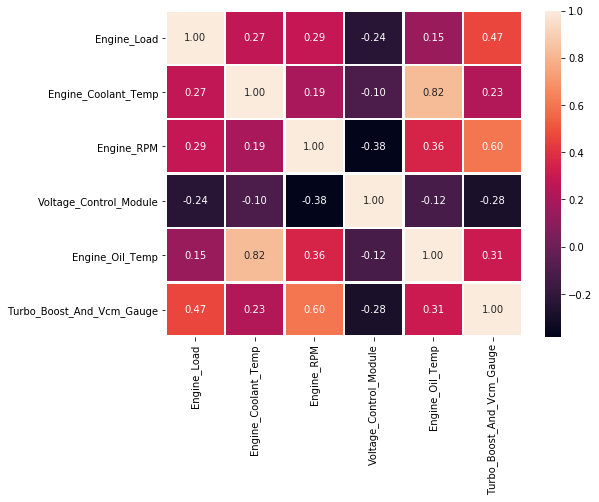

In [11]:
#Correlation matrix

corr_mat = df.corr()

f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr_mat, annot = True, linewidths = 1.5, fmt = '.2f', ax = ax);

b, t = ax.get_ylim() #discover the values for bottom and top
b += 0.5 #Add 0.5 to the bottom
t -= 0.5 #Subtract 0.5 from the top


### Visualisation

* Continuous features

In [12]:
# checking skewness 
skew_columns = (df
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Turbo_Boost_And_Vcm_Gauge    3.08317
dtype: float64

In [13]:
# Turbo boost and Vcm is skewed so applying log transformation
df['Turbo_Boost_And_Vcm_Gauge'] = np.log1p(df['Turbo_Boost_And_Vcm_Gauge'])

C:\Users\guest23455\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# visualise

Text(0, 0.5, 'Distribution')

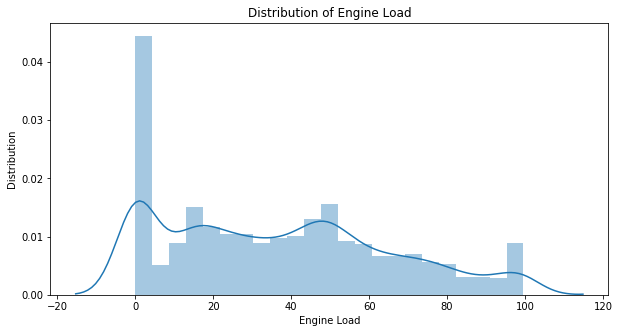

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df.Engine_Load)
plt.title('Distribution of Engine Load')
plt.xlabel('Engine Load')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

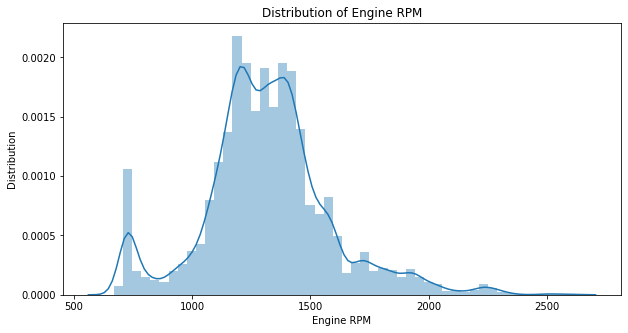

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df.Engine_RPM)
plt.title('Distribution of Engine RPM')
plt.xlabel('Engine RPM')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

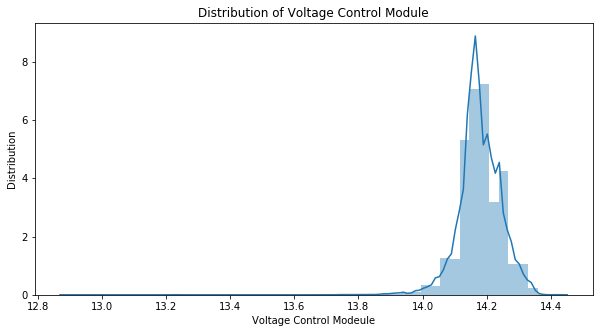

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df['Voltage_Control_Module'])
plt.title('Distribution of Voltage Control Module')
plt.xlabel('Voltage Control Modeule')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

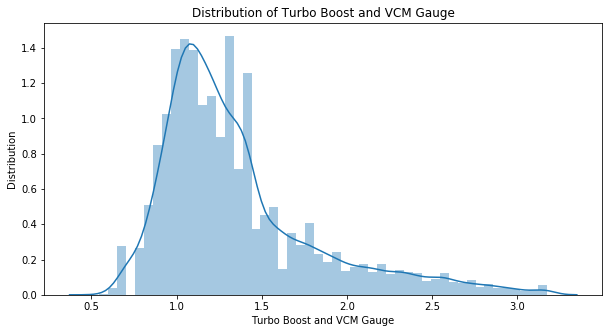

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(df.Turbo_Boost_And_Vcm_Gauge)
plt.title('Distribution of Turbo Boost and VCM Gauge')
plt.xlabel('Turbo Boost and VCM Gauge')
plt.ylabel('Distribution')

### Categorical features

Text(0, 0.5, 'Count (Number of Observations)')

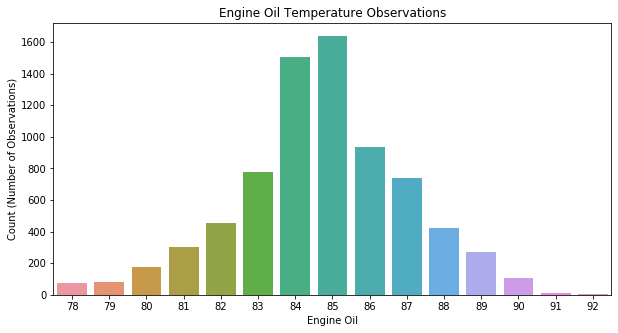

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Engine_Oil_Temp',data=df)
plt.title('Engine Oil Temperature Observations')
plt.xlabel('Engine Oil')
plt.ylabel('Count (Number of Observations)')

Text(0, 0.5, 'Count (Number of Observations)')

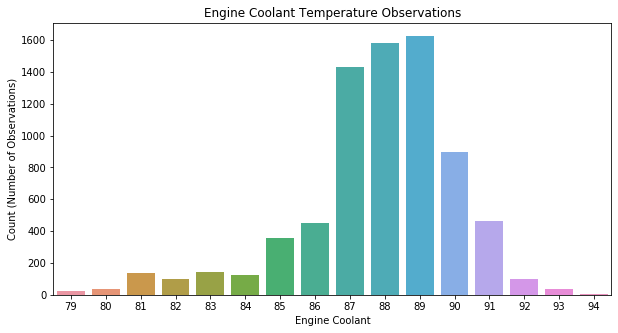

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Engine_Coolant_Temp',data=df)
plt.title('Engine Coolant Temperature Observations')
plt.xlabel('Engine Coolant')
plt.ylabel('Count (Number of Observations)')